<a href="https://colab.research.google.com/github/Schimidel/UGRH-s-PrecipitacaoeTemperatura/blob/main/Mapa_UGRH_PARANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture

!pip install -U xarray[complete] # reinstala todo o xarray (útil nessa versão do colab por conta do cftime)

!pip install salem  #Instala o salem e o rasterio
!pip install rasterio

!pip install cartopy # Instala o cartopy

!pip install erddapy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importa as bibliotecas
import xarray as xr #Biblioteca para netcdf
import numpy as np
import requests #Biblioteca para fazer download direto do link htlm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import geopandas as gpd
from shapely.geometry import Polygon
import salem #Biblioteca de recorte geoespacial
import cartopy.crs as ccrs #Biblioteca de criação de mapas
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from scipy import stats

In [ ]:
# URL do arquivo ZIP
url = "https://github.com/andrebelem/pythonverse/raw/main/datasets/SNIRH_UGRHs_2020.zip"

# Nome do arquivo local para salvar
nome_arquivo = "SNIRH_UGRHs_2020.zip"

# Faz o download do arquivo
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Abre o arquivo local em modo de escrita em bytes
    with open(nome_arquivo, "wb") as f:
        # Escreve os dados no arquivo
        f.write(response.content)
    print("Download concluído com sucesso!")

Download concluído com sucesso!


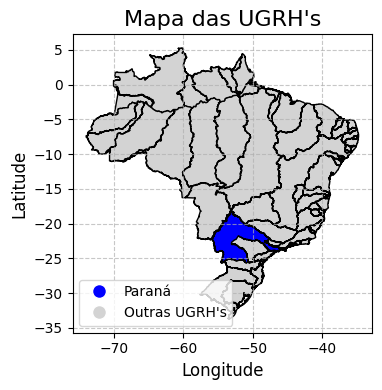

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Carregar os dados
gdf = gpd.read_file("SNIRH_UGRHs_2020.zip")

# Filtrar a bacia desejada (exemplo usando o Paraná)
parana = gdf[gdf.NOME == "Paraná"]

# Criar uma figura e eixo
fig, ax = plt.subplots(figsize=(6, 4))

# Desenhar o mapa das bacias do Brasil
gdf.plot(ax=ax, color='lightgray', edgecolor='black', label="Outras UGRH's")

# Plotar a bacia desejada com destaque
parana.plot(ax=ax, color='blue', edgecolor='black', label='Paraná')

# Personalizar o estilo do mapa
ax.set_title("Mapa das UGRH's", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_aspect('equal', adjustable='box')

# Adicionar grade
ax.grid(True, linestyle='--', alpha=0.7)

# Criar elementos para a legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Paraná'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10, label="Outras UGRH's")]

# Adicionar legenda
ax.legend(handles=legend_elements, loc='lower left')

# Exibir o mapa
plt.tight_layout()
plt.savefig("Mapa_Bacias_Hidrográficas.png")
plt.show()

<ipython-input-9-3910665915>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


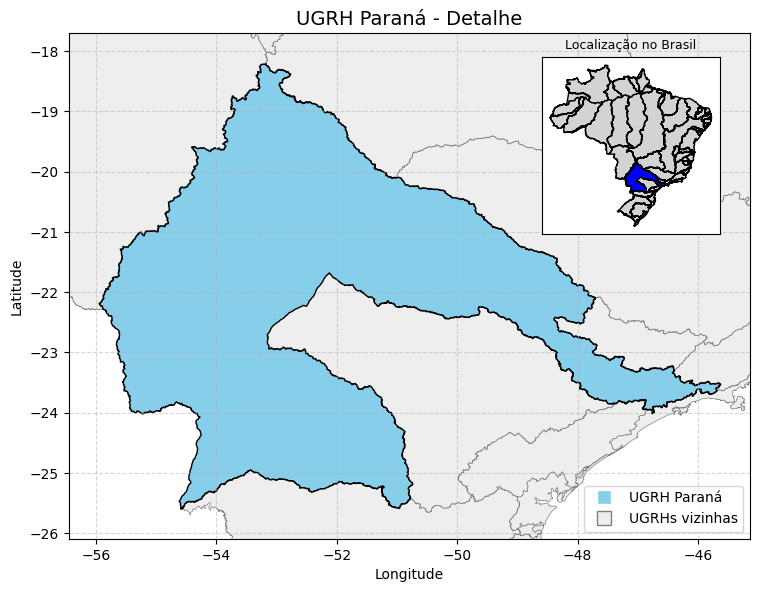

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

# Carregar os dados
gdf = gpd.read_file("SNIRH_UGRHs_2020.zip")

# Filtrar a bacia desejada
parana = gdf[gdf.NOME == "Paraná"]

# Filtrar outras UGRHs
outras = gdf[gdf.NOME != "Paraná"]

# Criar figura e eixo principal
fig, ax_main = plt.subplots(figsize=(8, 6))

# Plotar UGRHs vizinhas em cinza claro
outras.plot(ax=ax_main, color='#eeeeee', edgecolor='gray', linewidth=0.5)

# Plotar a UGRH Paraná com destaque
parana.plot(ax=ax_main, color='skyblue', edgecolor='black', linewidth=1)

# Configurações do eixo principal
ax_main.set_title("UGRH Paraná - Detalhe", fontsize=14)
ax_main.set_xlabel("Longitude")
ax_main.set_ylabel("Latitude")
ax_main.set_aspect('equal')
ax_main.grid(True, linestyle='--', alpha=0.5)

# Aplicar zoom na UGRH Paraná
xmin, ymin, xmax, ymax = parana.total_bounds
ax_main.set_xlim(xmin - 0.5, xmax + 0.5)  # margens para não cortar
ax_main.set_ylim(ymin - 0.5, ymax + 0.5)

# Mini mapa (inset)
ax_inset = inset_axes(
    ax_main, width="35%", height="35%", loc='upper right',
    bbox_to_anchor=(0.02, -0.02, 1, 1), bbox_transform=ax_main.transAxes, borderpad=1
)

# Plotar todas UGRHs no mini mapa
gdf.plot(ax=ax_inset, color='lightgray', edgecolor='black')

# Destacar Paraná no mini mapa
parana.plot(ax=ax_inset, color='blue', edgecolor='black')

# Remover grade e eixos do mini mapa
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_title("Localização no Brasil", fontsize=9)
ax_inset.set_aspect('equal')

# Legenda no mapa principal
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', markersize=10, label='UGRH Paraná'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#eeeeee', markeredgecolor='gray', markersize=10, label='UGRHs vizinhas')
]
ax_main.legend(handles=legend_elements, loc='lower right')

# Salvar e mostrar
plt.tight_layout()
plt.savefig("Mapa_UGRH_Parana_Com_Vizinhas.png", dpi=300)
plt.show()

In [ ]:
!pip install contextily

<ipython-input-21-3637440853>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


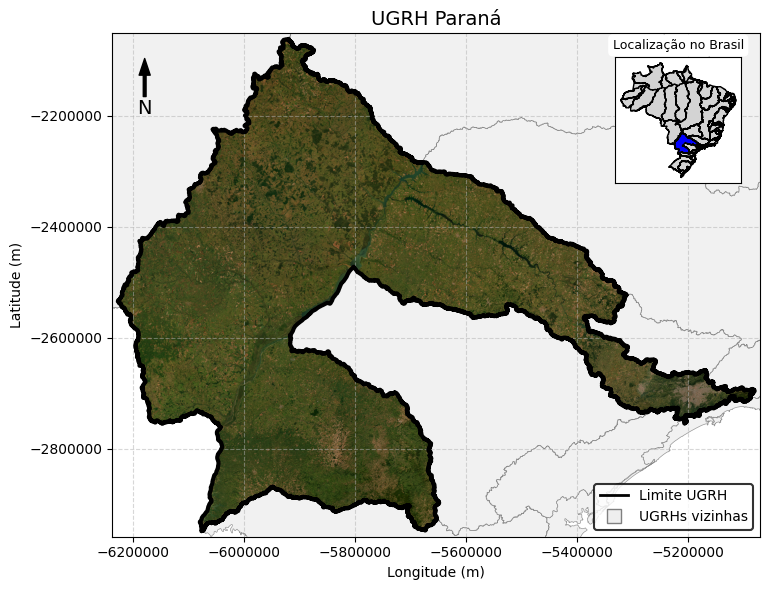

In [ ]:
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
import contextily as ctx
import requests, zipfile, io
import rasterio
import rasterio.plot
from rasterio.mask import mask
import tempfile
import numpy as np

# === Baixar e extrair shapefile do Natural Earth países ===
url_countries = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
r_countries = requests.get(url_countries)
z_countries = zipfile.ZipFile(io.BytesIO(r_countries.content))
z_countries.extractall("naturalearth_countries")

# === Carregar shapefile do Brasil e converter para EPSG:3857 ===
brasil = gpd.read_file("naturalearth_countries/ne_110m_admin_0_countries.shp")
brasil = brasil[brasil['NAME'] == "Brazil"].to_crs(epsg=3857)

# === Carregar shapefile das UGRHs ===
gdf = gpd.read_file("SNIRH_UGRHs_2020.zip")
gdf_3857 = gdf.to_crs(epsg=3857)
parana = gdf_3857[gdf_3857.NOME == "Paraná"]
outras = gdf_3857[gdf_3857.NOME != "Paraná"]

# === Obter bounds para o Paraná ===
bounds = parana.total_bounds
zoom = 10  # Zoom adequado

# === Baixar imagem de fundo com contextily ===
with tempfile.NamedTemporaryFile(suffix=".tif") as tmpfile:
    ctx.bounds2raster(*bounds, tmpfile.name, zoom=zoom, source=ctx.providers.Esri.WorldImagery)

    # Abrir com rasterio e recortar com a geometria da UGRH Paraná
    with rasterio.open(tmpfile.name) as src:
        out_image, out_transform = mask(src, parana.geometry, crop=True)
        out_meta = src.meta.copy()

# Atualizar metadados
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# === Criar figura ===
fig, ax_main = plt.subplots(figsize=(8, 6))

# Plotar UGRHs vizinhas
outras.plot(ax=ax_main, color='#eeeeee', edgecolor='gray', linewidth=0.5, alpha=0.8)

# Plotar imagem de satélite recortada
rasterio.plot.show(out_image, transform=out_transform, ax=ax_main)

# Plotar polígono do Paraná
parana.plot(ax=ax_main, facecolor='none', edgecolor='black', linewidth=3, zorder=10)

# Aplicar limites do Paraná
xmin, ymin, xmax, ymax = parana.total_bounds
ax_main.set_xlim(xmin - 10000, xmax + 10000)
ax_main.set_ylim(ymin - 10000, ymax + 10000)

# Configurações do eixo
ax_main.set_title("UGRH Paraná", fontsize=14)
ax_main.set_xlabel("Longitude (m)")
ax_main.set_ylabel("Latitude (m)")
ax_main.grid(True, linestyle='--', alpha=0.5)

# Forçar formato numérico completo nos eixos
ax_main.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax_main.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax_main.ticklabel_format(useOffset=False, style='plain', axis='both')

ax_main.annotate('N',
    xy=(0.05, 0.95),     # ponta da seta (posição mais alta)
    xytext=(0.05, 0.85), # posição do texto "N" (abaixo da ponta)
    arrowprops=dict(facecolor='black', width=2, headwidth=8),
    ha='center', va='center',
    fontsize=14,
    xycoords='axes fraction', textcoords='axes fraction')

# Mini mapa (inset) em EPSG:4326
ax_inset = inset_axes(
    ax_main, width="25%", height="25%", loc='upper right',
    bbox_to_anchor=(0.02, -0.02, 1, 1), bbox_transform=ax_main.transAxes, borderpad=1
)

# Plotar todas UGRHs no mini mapa
gdf.plot(ax=ax_inset, color='lightgray', edgecolor='black')
parana.to_crs(epsg=4326).plot(ax=ax_inset, color='blue', edgecolor='black')

ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_title(
    "Localização no Brasil",
    fontsize=9,
    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3')
)
ax_inset.set_aspect('equal')

# Legenda
legend_elements = [
    Line2D([0], [0], color='black', linewidth=2, label='Limite UGRH'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#eeeeee', markeredgecolor='gray', markersize=10, label='UGRHs vizinhas')
]

legend = ax_main.legend(handles=legend_elements, loc='lower right', frameon=True)

# Configurar borda preta e espessura da linha da legenda
frame = legend.get_frame()
frame.set_edgecolor('black')   # Cor da borda preta
frame.set_linewidth(1.5)       # Espessura da borda

legend.set_zorder(1000)

plt.tight_layout()
plt.savefig("Mapa_UGRH_Parana_Satelite_Recortado.png", dpi=300)
plt.show()